<span style="color: black; font-family: Verdana; font-size: 2em;">Garman-Kohlhagen Option Pricing Model</span>


<span style="color: black; font-family: Verdana; font-size: 1em;">The standard Black-Scholes Model assumes that the interest rate is constant and homogeneous across all countries. Garman-Kohlhagen Model introduces a diffential component between domestic and foreign risk-free interest rate, since each country has exposure to different risk factors. As a result, this model has been used to compute the fair value of European FX Options.</span>


In [1]:
__author__ = 'Faraujo'

### Import module ###
import numpy as np
import scipy.stats as ss
from tkinter import *

### GUI configuration ###
root = Tk()
root.title("Garman-Kohlhagen Option Pricing Model")

## Setting geometry ## 
root.geometry('400x300+600+200') 
root.resizable(False,False)


### Label ###
Label(root, text="SPOT PRICE:").grid(row = 0, sticky = W)
Label(root, text="STRIKE PRICE:").grid(row = 1, sticky = W)
Label(root, text="TIME TO MATURITY:").grid(row = 2, sticky = W)
Label(root, text="DOMESTIC RISKLESS INTEREST RATE:").grid(row = 3, sticky = W)
Label(root, text="FOREIGN RISKLESS INTEREST RATE:").grid(row = 4, sticky = W)
Label(root, text="VOLATILITY OF THE UNDERLYING ASSET:").grid(row = 5, sticky = W)
Label(root, text="OPTION TYPE:").grid(row = 6, sticky = W)


### User input ###
S = Entry(root)
S.grid(row=0, column=1)
K = Entry(root)
K.grid(row=1, column=1)
T = Entry(root)
T.grid(row=2, column=1)
r_d = Entry(root)
r_d.grid(row=3, column=1)
r_f = Entry(root)
r_f.grid(row=4, column=1)
sigma = Entry(root)
sigma.grid(row=5, column=1)


# Temp variable
temp_variable = StringVar() 

## Dropdown Menu (Option_type) ##
dropDownList = ["CALL", "PUT"]

drop_down = OptionMenu(root, temp_variable, *dropDownList)

temp_variable.set(dropDownList[0]) 

drop_down.grid(row=6, column=1)

### output label ###
rlabel1 = Label(root)
rlabel1.grid(row = 7, sticky = W)

### main function - Garman-Kohlhagen Model ###
def FX_vanilla() :

    d1 = (np.log((float(S.get())) / (float(K.get()))) + ((float(r_d.get()) - float(r_f.get())) + 0.5 * (float(sigma.get())) ** 2) * (float(T.get()))) / ((float(sigma.get())) * np.sqrt(float(T.get())))

    d2 = d1 - (float(sigma.get()) * np.sqrt(float(T.get())))

    ### If condition based on the option type

    if temp_variable.get() == 'CALL':

        alpha = 1

    else:

        alpha = -1

    price = int(alpha)*(float(S.get()) * np.exp(-1*(float(r_f.get())) * float(T.get()))*ss.norm.cdf(alpha*d1, 0, 1) - float(K.get()) * np.exp(-1*float(r_d.get()) * float(T.get()))* ss.norm.cdf(alpha*d2, 0, 1))

    rlabel1.config(text="Option price: %s" % price )

    return

### button ###
btn = Button(root, text="Compute the price", command=FX_vanilla).grid(row = 7, column = 1, sticky = E)

### mainloop ###
root.mainloop()


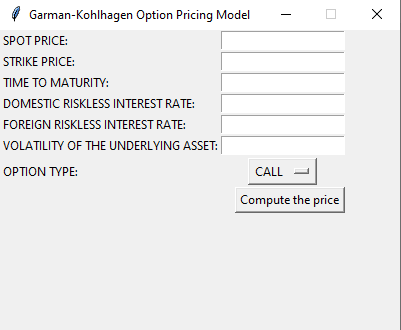

<span style="color: black; font-family: Verdana; font-size: 1em;">The user enters valid parameters of the model and it returns the fair value based on the option type.</span>